In [1]:
import pandas as pd
import re
import matplotlib.pyplot as plt
from tqdm import tqdm
Met =pd.read_csv('data/Met.csv')
IEd = pd.read_csv('data/IEd.csv')
LMS = pd.read_csv('data/LMS.csv')
LMS.drop(LMS[LMS.Type=='Traveller'].index,inplace=True)


# Concatenating Data

In [2]:
df = pd.concat([Met,IEd, LMS])

/home/ananya/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


# Encoding From Variable

In [3]:
def encode_from(col,df):
    df.fillna(0,inplace=True)

    di = {}
    try: 
        n = len(col.value_counts(ascending = True))
        for i in range(len(col.value_counts(ascending = True))):
            di[col.value_counts(ascending = True).index[i]] =  list(col.value_counts(ascending=True))[i]
        for i in di:
            
            if(di[i]==1):
                di[i]=1
            elif(di[i]==2):
                di[i]=2
            elif(di[i]==3):
                di[i]=3
            elif(di[i]==4):
                di[i]=4
            elif(di[i]==5):
                di[i]=5
            elif(di[i]==6):
                di[i]=6
            elif(di[i]==7):
                di[i]=7
            elif(di[i]==8):
                di[i]=8
            elif(di[i]==9):
                di[i]=9
            elif(di[i]==10):
                di[i]=10
            elif(di[i]==11):
                di[i]=11
            elif(di[i]==12 or di[i]==13):
                di[i]=12
            elif(di[i]==14 or di[i]==16):
                di[i]=13
            elif(di[i] in range(17,21)):
                di[i]=14
            elif(di[i] in range(21,31)):
                di[i]=15
            elif (di[i] in range(31,41)) :
                di[i] = 16
            elif (di[i] in range(41,51)) :
                di[i] = 17
            elif (di[i] in range(51,151)) :
                di[i] = 18
            elif (di[i] in range(151,201)) :
                di[i] = 19
            elif di[i] >200 :
                di[i] = 20
    except:
        print('Error')
    for i in tqdm(range(col.shape[0])):
        col.iloc[i]=di[col.iloc[i]] 
            
    print(di)

In [4]:
encode_from(df['From City'],df)

  0%|          | 0/118224 [00:00<?, ?it/s]/home/ananya/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
100%|██████████| 118224/118224 [13:44<00:00, 143.41it/s]

{'Gulmarg': 1, 'Madurai': 1, 'Udupi': 1, 'Roorkee': 1, 'DL': 1, 'Alleppey': 1, 'Jamshedpur': 1, 'Khajuraho': 1, 'Nicobar Islands': 1, 'Kanyakumari': 1, 'Durgapur': 1, 'Itanagar': 1, 'Darjeeling': 1, 'Trivandrum': 1, 'Vasco Da Gama': 1, 'Anand': 1, 'Bikaner': 1, 'Srinagar': 1, 'Quilon': 1, 'Tezpur': 1, 'Rishikesh': 1, 'Vaishali': 1, 'Mysore': 1, 'HR': 1, 'Murshidabad': 1, 'Mangalore': 1, 'Gandhinagar': 1, 'Rajkot': 2, 'Coimbatore': 2, 'Bhilwara': 2, 'Cuttack': 2, 'Greater Noida': 2, 'Kota': 2, 'Thane': 2, 'Alwar': 2, 'Kullu': 2, 'Imphal': 2, 'Aurangabad': 2, 'Shekhawati': 2, 'Faridabad': 3, 'Jammu': 3, 'kanpur': 3, 'Shimla': 3, 'Patiala': 3, 'Dhanbad': 3, 'Udaipur': 3, 'Jodhpur': 3, 'Amritsar': 3, 'Noida': 3, 'Dehradun': 3, 'Muzaffarnagar': 3, 'Nagpur': 3, 'Guwahati': 3, 'Kozhikode': 3, 'Gaya': 4, 'Agra': 4, 'Varanasi': 4, 'Navi Mumbai': 4, 'Nashik': 4, 'Nalanda': 4, 'Raipur': 4, 'Trichy': 4, 'Ujjain': 4, 'Aligarh': 4, 'Tirupati': 4, 'Ludhiana': 5, 'Karnal': 5, 'Ranchi': 5, 'Siliguri': 

In [5]:
df['From City'].unique()

array([20, 16, 18, 12,  4,  2,  1,  9,  3,  6, 11, 13,  5, 10,  7,  8])

# Encoding To City

In [6]:
for i in tqdm(range(df['To City'].shape[0])):
    if df['To City'].iloc[i] in [ 'India', 'UAE','Singapore']:
        df['To City'].iloc[i]= 4#'Asia'
    elif (df['To City'].iloc[i] in ['Canada', 'USA']):
        df['To City'].iloc[i] = 8 #'North America'
    
    elif(df['To City'].iloc[i] in ['Australia', 'New Zealand', 'New Zeland']):
        df['To City'].iloc[i] = 6 #'Oceania'
        
       
    elif (df['To City'].iloc[i] in ['Ireland', 'UK','Germany' 'Netherlands', 'Uk',
       'Denmark', 'Switzerland', 'Spain', 'Italy', 'France',
       'New Zeland', 'Hungary', 'Freance', 'Usn', 'Itley', 'Netherland']):
        df['To City'].iloc[i] = 7 #'Europe'
    else:
        df['To City'].iloc[i] = 0

100%|██████████| 118224/118224 [13:59<00:00, 140.90it/s]


In [7]:
df['To City'].unique()

array([0, 8, 6, 7, 4])

# Getting Source Score

In [8]:
sor = pd.read_csv('final_student_score.csv')
sor.rename(columns={'Score0.3':'Score'},inplace=True)
sor['Source'] = sor['Source'].str.replace(' ','')
sor['Source'] = sor['Source'].str.lower()
df['Source'] = df['Source'].str.replace(' ','')
df['Source'] = df['Source'].str.lower()
df1 = pd.merge(df, sor, how = 'left', on='Source')
df1.Score.fillna(0,inplace = True)


In [9]:
df.isnull().sum()

Email            0
From City        0
Lead Date        0
Name             0
Nights           0
Pax              0
Phone            0
Source           0
To City          0
Type             0
Unnamed: 0       0
Unnamed: 4       0
referral_page    0
dtype: int64

# Calculating Final Score

In [10]:
def sca(df):
    for i in ['Score','To City','From City']:
        df[i] = (df[i]/df[i].max())*100
sca(df1)
wt = [9,8,3]
df1['FS'] = 9*df1['Score']+(8*df1['To City'])+(3*df1['From City'])


In [11]:
df1['FS'] = (df1['FS']/df1['FS'].max())*1000

# Creating Final File

In [12]:
df2 = df1[['Name','Email','Phone','Score','Source','To City','From City','FS']]
df2['FS_percentile'] = df2['FS'].rank(pct=True)*100
df2['FS_percentile'] = df2['FS_percentile'].astype(int)
df2.to_csv('Student.csv')

/home/ananya/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/ananya/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


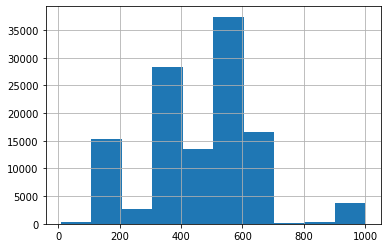

In [19]:
df2['FS'].hist()

Text(0.5, 1.0, 'Student_Data')

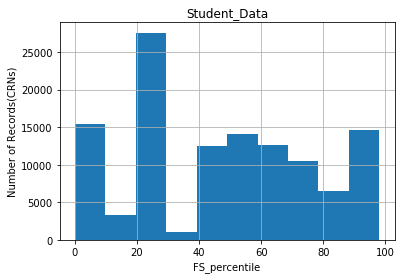

In [19]:
df2['FS_percentile'].hist()
plt.xlabel('FS_percentile')
plt.ylabel('Number of Records(CRNs)')
plt.title('Student_Data')

In [16]:
t = df2.groupby(['FS_percentile','Source']).count()
ls = list(t.loc[70:100].index)
so = []
for i in ls:
    print(i[1])
    so.append(i[1])
print(pd.Series(so).unique())
pd.DataFrame(pd.Series(so).unique()).to_csv('student_source.csv')

amberstudents
google
inhousecallcenter
ivr
web_chat
yocket
referral
jigserv_march_solo
website
cardinfo.in
mentorix
mentorix
mentorix
['amberstudents' 'google' 'inhousecallcenter' 'ivr' 'web_chat' 'yocket'
 'referral' 'jigserv_march_solo' 'website' 'cardinfo.in' 'mentorix']
